## This script is used to create a complete map
with element of scale bar, north, legend, title

In [1]:
import geopandas as gpd

shapefile = 'data/child_blood_lead_levels_by_ct.shp'

df = gpd.read_file(shapefile)

## Draw the scale bar
Function of drawing scale bar, you don't need to understand this function now. If you are interested, you can read it and recycle the code in your applications in future.

In [8]:
### https://stackoverflow.com/questions/32333870/how-can-i-show-a-km-ruler-on-a-cartopy-matplotlib-plot/50674451#50674451
# Notes:

# if you don't use UTM for you axes, the bar will be drawn crooked
# the North arrow assumes north is up

import os
import cartopy.crs as ccrs
from math import floor
import matplotlib.pyplot as plt
from matplotlib import patheffects
import matplotlib

if os.name == 'nt':
    matplotlib.rc('font', family='Arial')
else:  # might need tweaking, must support black triangle for N arrow
    matplotlib.rc('font', family='DejaVu Sans')


def scale_bar(ax, length, at_x=(0.1, 0.4), at_y=(0.05, 0.075), max_stripes=2):
    """
    This fucntion is used to create scale bar using matploblit
    Ref: http://stackoverflow.com/a/35705477/1072212
    
    Last modified by Xiaojiang Li, Temple University on Aug 8th, 2019 
    
    parameters:
        ax: the axes to draw the scalebar on.
        location: is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
        length: the length of the scalebar in km.
        max_stripes: the number of strips in the scael bar
    """
    
    # fetch axes coordinate mins+maxes
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    
    #print('The x0 and x1 are:', x0, x1)
    
    # set target rectangle in-visible-area (aka 'Axes') coordinates
    ax0, ax1 = at_x
    ay0, ay1 = at_y
    
    # choose exact X points as sensible grid ticks with Axis 'ticker' helper
    x_targets = [x0 + ax * (x1 - x0) for ax in (ax0, ax1)]
    ll = mpl.ticker.MaxNLocator(nbins=max_stripes, steps=[1,2,4,5,10])
    x_vals = ll.tick_values(*x_targets)
    
    # grab min+max for limits
    xl0, xl1 = x_vals[0], x_vals[-1]
    
    # calculate Axes Y coordinates of box top+bottom
    yl0, yl1 = [y0 + ay * (y1 - y0) for ay in [ay0, ay1]]
    
    # calculate Axes Y distance of ticks + label margins
    y_margin = (yl1-yl0)*0.25
    
    # fill black/white 'stripes' and draw their boundaries
    fill_colors = ['black', 'white']
    i_color = 0
    for xi0, xi1 in zip(x_vals[:-1],x_vals[1:]):
        # fill region
        plt.fill((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 fill_colors[i_color])
        # draw boundary
        plt.plot((xi0, xi1, xi1, xi0, xi0), (yl0, yl0, yl1, yl1, yl0),
                 'black')
        i_color = 1 - i_color
    
    # add short tick lines
    for x in x_vals:
        plt.plot((x, x), (yl0, yl0-y_margin), 'black')

    # add a scale legend 'Km'
    font_props = mfonts.FontProperties(size='medium', weight='normal')
    plt.text(
        0.5 * (xl0 + xl1),
        yl1 + y_margin,
        'Km',
        verticalalignment='bottom',
        horizontalalignment='center',
        fontproperties=font_props)

    # add numeric labels
    for x in x_vals:
        plt.text(x,
                 yl0 - 2 * y_margin,
                 '{:g}'.format((x - xl0) * 0.001),
                 verticalalignment='top',
                 horizontalalignment='center',
                 fontproperties=font_props)
    
    ax.text(xl0 + xl1*0.1, yl1 + (yl1-yl0)*2, u'\u25B2 \nN ', ha='center', fontsize=20, family='Arial', rotation = 0)
    

## Create a choropleth map with scale bar and north arrow

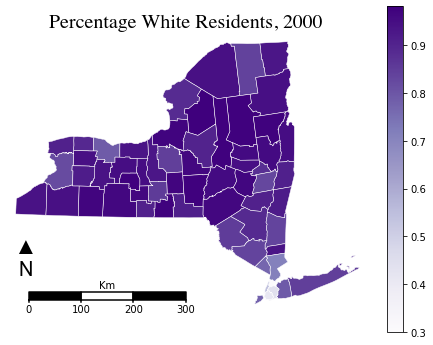

In [9]:

import cartopy.crs as ccrs
from math import floor
import matplotlib.font_manager as mfonts
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

ny_census_tracts = gpd.read_file(gplt.datasets.get_path('ny_census'))
ny_census_tracts = ny_census_tracts.assign(
    percent_white=ny_census_tracts['WHITE'] / ny_census_tracts['POP2000']
)

ax = gplt.choropleth(
    ny_census_tracts,
    hue='percent_white',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.LambertConformal()
)

scale_bar(ax, 100, at_y=(0.02, 0.05))  # 100 km scale bar

plt.title("Percentage White Residents, 2000", fontname="Times", fontsize = 20)
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)


In [ ]:
ny_census_tracts = gpd.read_file('data/child_blood_lead_levels_by_ct.shp')
ny_census_tracts.head()

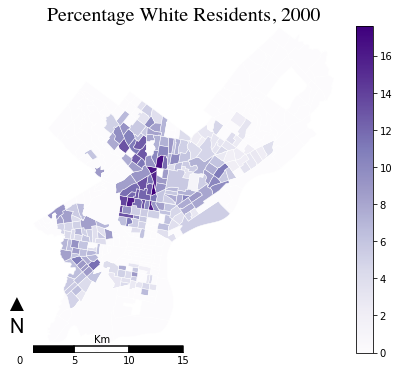

In [7]:

import cartopy.crs as ccrs
from math import floor
import matplotlib.font_manager as mfonts

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

blood_lead_tracts = gpd.read_file('data/child_blood_lead_levels_by_ct.shp')

ax = gplt.choropleth(
    blood_lead_tracts,
    hue='perc_5plus',
    cmap='Purples', linewidth=0.5,
    edgecolor='white', k=None,
    legend=True,
    projection=gcrs.LambertConformal()
)

scale_bar(ax, 100, at_y=(0, 0.02))  # 100 km scale bar

plt.title("Percentage White Residents, 2000", fontname="Times", fontsize = 20)
plt.savefig("ny-state-demographics.png", bbox_inches='tight', pad_inches=0.1)


#### Homework 

Map the blood lead of Philadelphia, using color of 'Blues', Change the title as 'Blood lead level in Philadelphia', using the face color of black, with linewidth 0.2

